In [1]:
import tensorflow as tf

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
path_train = '/content/drive/MyDrive/Alexnet/train'
path_test = '/content/drive/MyDrive/Alexnet/test'

In [5]:
image_size = [224,224]

In [6]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87910968/87910968 [==============================] - 0s 0us/step


In [7]:
inception

In [8]:
folders = glob(r'/content/drive/MyDrive/Alexnet/train/*')

In [9]:
folders

['/content/drive/MyDrive/Alexnet/train/Tomato___healthy',
 '/content/drive/MyDrive/Alexnet/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Alexnet/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Alexnet/train/Tomato___Late_blight']

In [10]:
for layer in inception.layers:
    layer.trainable = False

In [11]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs = inception.input, outputs = prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Alexnet/train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Alexnet/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7419 images belonging to 4 classes.
Found 396 images belonging to 4 classes.


In [16]:
r = model.fit_generator(train_set, 
                        validation_data= test_set, 
                        epochs=5, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
232/232 [==============================] - 2174s 9s/step - loss: 1.3063 - accuracy: 0.8159 - val_loss: 0.6904 - val_accuracy: 0.8485
Epoch 2/5
232/232 [==============================] - 879s 4s/step - loss: 0.6478 - accuracy: 0.8966 - val_loss: 0.4253 - val_accuracy: 0.9293
Epoch 3/5
232/232 [==============================] - 855s 4s/step - loss: 0.7029 - accuracy: 0.9051 - val_loss: 0.6287 - val_accuracy: 0.9217
Epoch 4/5
232/232 [==============================] - 840s 4s/step - loss: 0.5396 - accuracy: 0.9279 - val_loss: 0.5418 - val_accuracy: 0.9192
Epoch 5/5
232/232 [==============================] - 852s 4s/step - loss: 0.5470 - accuracy: 0.9358 - val_loss: 0.8354 - val_accuracy: 0.9040


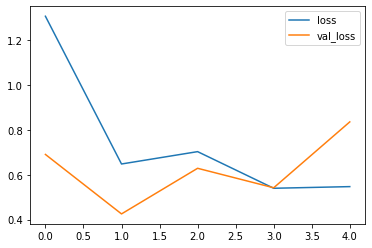

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

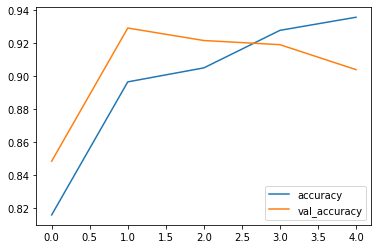

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')

In [19]:
y_pred = model.predict(test_set)
y_pred

13/13 [==============================] - 42s 3s/step


array([[2.21738992e-06, 9.99997675e-01, 2.23003859e-22, 2.05255928e-22],
       [9.99999940e-01, 3.68916823e-22, 1.58278856e-34, 3.39405371e-26],
       [4.75249110e-17, 4.20339734e-13, 9.99999940e-01, 2.18033456e-18],
       ...,
       [6.25878816e-33, 2.74016859e-28, 1.51271929e-32, 1.00000000e+00],
       [8.86483848e-01, 1.13516144e-01, 3.07004920e-18, 9.50400262e-12],
       [7.37665509e-25, 1.00000000e+00, 7.93551161e-27, 0.00000000e+00]],
      dtype=float32)

In [20]:
y_pred.shape

(396, 4)

In [21]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([1, 0, 2, 1, 0, 3, 0, 1, 2, 1, 0, 1, 0, 3, 2, 3, 2, 2, 3, 3, 1, 3,
       2, 1, 2, 0, 2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 0, 0, 3, 0, 2,
       2, 3, 0, 3, 3, 1, 2, 3, 0, 1, 2, 3, 3, 0, 3, 3, 1, 2, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 0, 3, 3, 3, 3, 2, 0, 1, 0, 0, 0, 0, 3, 3, 0, 3,
       1, 0, 3, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 0, 2, 1, 1, 3, 1, 3, 3,
       3, 3, 1, 1, 0, 1, 3, 0, 2, 3, 1, 1, 1, 0, 3, 3, 2, 3, 2, 3, 1, 2,
       3, 3, 1, 0, 2, 1, 0, 3, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0,
       0, 3, 1, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 1, 0, 1,
       3, 3, 1, 3, 1, 1, 0, 0, 1, 1, 2, 3, 0, 0, 1, 2, 2, 3, 2, 1, 3, 3,
       0, 0, 1, 2, 3, 0, 0, 2, 2, 3, 2, 0, 1, 3, 0, 3, 3, 0, 0, 3, 1, 1,
       1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 3, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 2, 0, 3, 3, 2, 1, 3, 1, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 3, 2, 3, 0, 3, 1, 3, 0, 0, 0, 3, 1, 1, 1,
       0, 2, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [22]:
y_pred.shape

(396, 4)

In [23]:
model.save('model_inceptionv3.h5')

In [24]:
from tensorflow.keras.models import load_model

model=load_model('model_inceptionv3.h5')

In [25]:
y_pred = model.predict(test_set)
len(y_pred)

13/13 [==============================] - 42s 3s/step


396

In [26]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

13/13 [==============================] - 39s 3s/step


array([3, 1, 0, 1, 0, 1, 1, 3, 0, 1, 3, 1, 3, 1, 0, 1, 2, 0, 0, 1, 0, 3,
       3, 2, 3, 0, 1, 2, 2, 3, 0, 1, 1, 0, 1, 0, 3, 0, 1, 2, 1, 3, 2, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 2, 3, 3, 1, 0, 1, 0, 1, 3, 3, 1, 2,
       2, 3, 2, 3, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 2, 0, 1, 3,
       0, 2, 2, 2, 3, 1, 1, 1, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 0, 1, 1, 3,
       1, 2, 3, 0, 1, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 0, 3, 0, 2, 1, 0, 3,
       3, 2, 2, 1, 3, 1, 3, 0, 0, 0, 3, 1, 3, 2, 2, 2, 2, 0, 1, 3, 1, 2,
       1, 1, 1, 2, 3, 0, 1, 0, 1, 3, 3, 1, 0, 1, 3, 3, 3, 0, 1, 1, 0, 1,
       3, 1, 0, 1, 1, 1, 1, 2, 2, 3, 1, 0, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 3, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 0, 1, 2, 0, 1,
       0, 1, 3, 1, 2, 0, 1, 1, 1, 3, 0, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 1,
       3, 1, 0, 0, 3, 1, 3, 0, 3, 1, 2, 1, 3, 1, 1, 0, 3, 1, 0, 0, 1, 0,
       3, 2, 3, 3, 1, 1, 1, 0, 1, 0, 2, 3, 1, 2, 2, 3, 0, 3, 2, 1, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 3,